# Heart Disease Prediction (Classification)

## Data

Data is collected from UCI Machine Learning Repository https://archive.ics.uci.edu/dataset/45/heart+disease

A similar version of this data is also available in kaggle https://www.kaggle.com/ronitf/heart-disease-uci

## Model 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [3]:
hd = pd.read_csv("heart-disease.csv")
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
hd.shape

(303, 14)

<AxesSubplot: >

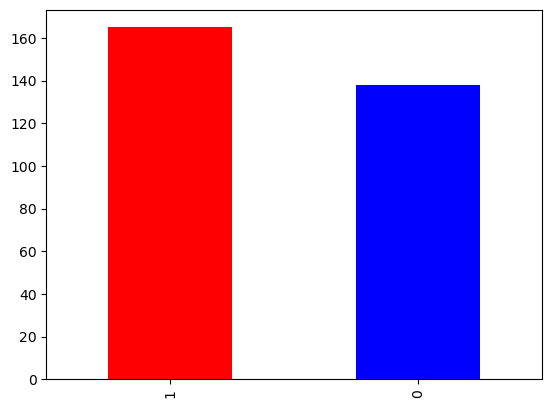

In [7]:
hd["target"].value_counts().plot(kind="bar",color=["red","blue"])

In [8]:
#Checking any missing values here
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


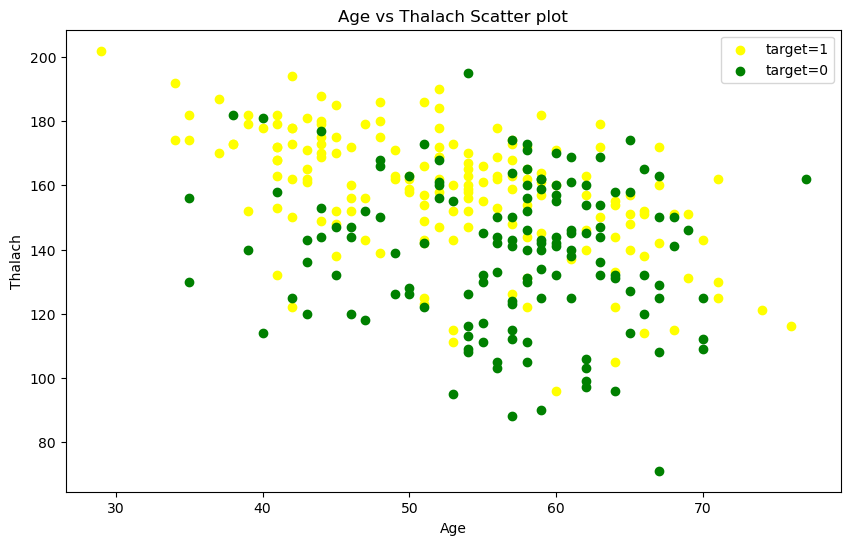

In [12]:
#Analysing the features
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(hd.age[hd.target==1],hd.thalach[hd.target==1],c="yellow")
ax.scatter(hd.age[hd.target==0],hd.thalach[hd.target==0],c="green")
ax.set(title="Age vs Thalach Scatter plot",xlabel="Age",ylabel="Thalach")
ax.legend(["target=1","target=0"])

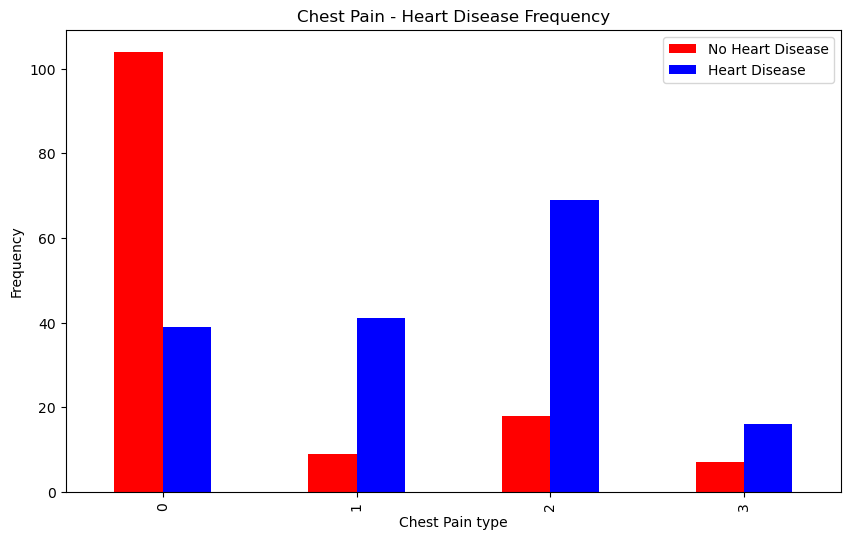

In [16]:
pd.crosstab(hd.cp,hd.target).plot(kind="bar",figsize=(10,6),color=["red","blue"])
plt.title("Chest Pain - Heart Disease Frequency")
plt.xlabel("Chest Pain type")
plt.ylabel("Frequency")
plt.legend(["No Heart Disease","Heart Disease"])

In [17]:
#Correlation Matrix
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


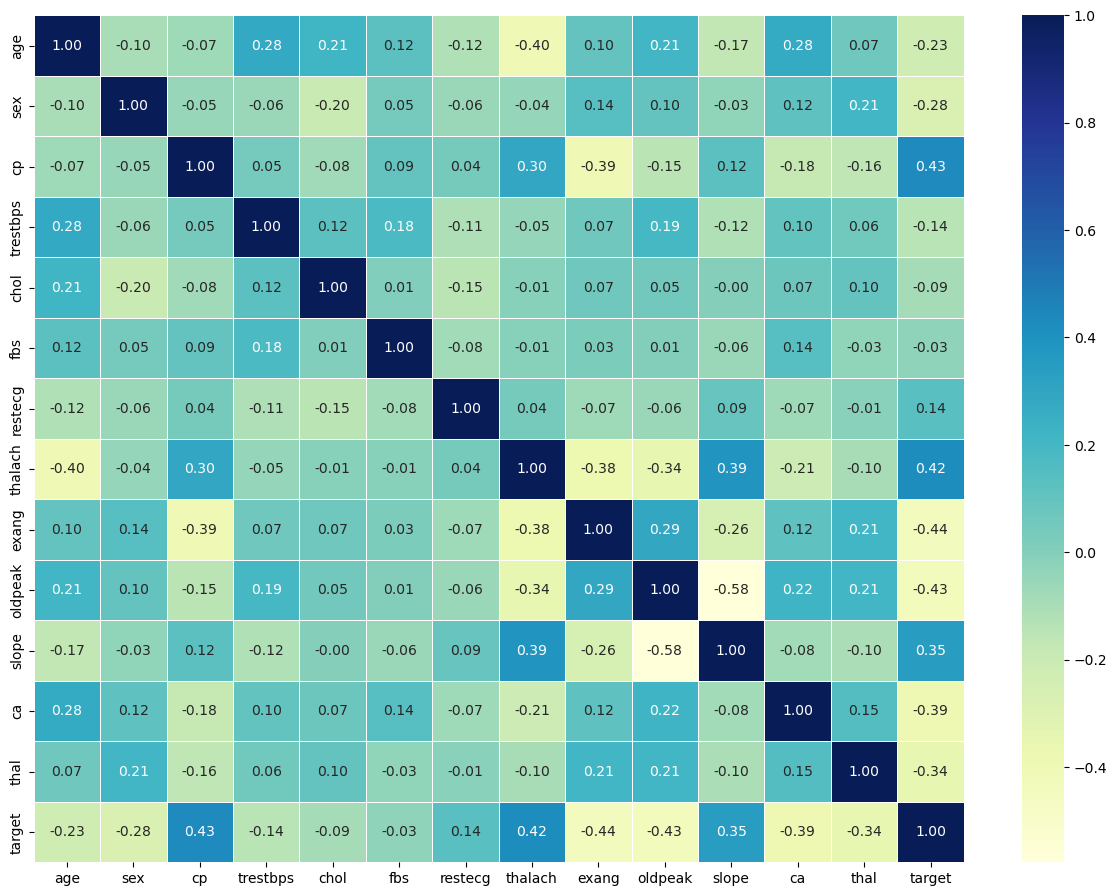

In [19]:
matrix = hd.corr()
fig,ax = plt.subplots(figsize=(15,11))
ax = sns.heatmap(matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

In [23]:
#Modelling using sklearn
X = hd.drop("target",axis=1)
Y = hd["target"]
#Data Split
np.random.seed(42)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

I am going to try 3 machine learning models Logistic Regression, Random Forest, K-Nearest Neighbors and choose an appropriate model with better accuracy

### 1) Logistic Regression

In [26]:
np.random.seed(42)
model_scores = {}
model = LogisticRegression()
model.fit(X_train,Y_train)
model_scores["LR"] = model.score(X_test,Y_test)

D:\machinelearning\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2) K-Nearest Neighbors

In [27]:
np.random.seed(42)
model = KNeighborsClassifier();
model.fit(X_train,Y_train)
model_scores["KNN"] = model.score(X_test,Y_test)

### 3) Random Forest

In [28]:
np.random.seed(42)
model = RandomForestClassifier();
model.fit(X_train,Y_train)
model_scores["RF"] = model.score(X_test,Y_test)

In [29]:
model_scores

{'LR': 0.8852459016393442, 'KNN': 0.6885245901639344, 'RF': 0.8360655737704918}

As we can see, the Logistic Regression Model has better accuracy on test dataset compared to other models. We can choose this as our baseline Model

### Improving the Model

#### Hyperparameter Tuning

In [30]:
train_scores = []
test_scores = []

#KNN
neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train,Y_train)
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))


Maximum Test score using KNN : 75.41%


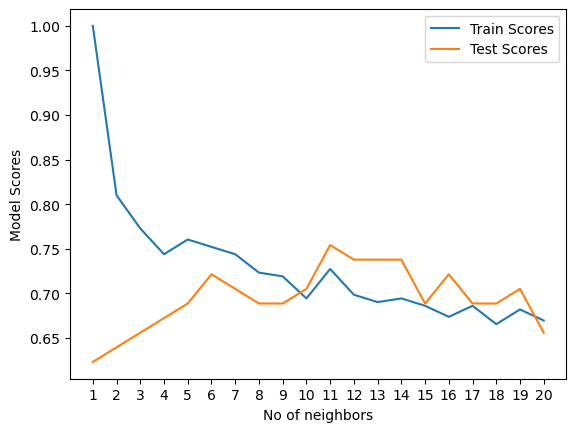

In [33]:
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("No of neighbors")
plt.ylabel("Model Scores")
plt.legend()

print(f"Maximum Test score using KNN : {max(test_scores)*100:0.2f}%")

#### Hyperparameter tuning using RandomizedSearchCV

We use RandomizedSearchCV to hypertune LogisticRegression and RandomForestClassifier models

In [41]:
#Logistic Regression
log_reg_grid = {"C":np.logspace(-4,4,20),"solver":["liblinear"]}
#RandomForest
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [35]:
np.random.seed(42)

res_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
res_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
res_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
res_log_reg.score(X_test,Y_test)

0.8852459016393442

In [42]:
np.random.seed(42)

res_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
res_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
res_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
res_rf.score(X_test,Y_test)

0.8688524590163934

In [45]:
#Hyper tuning models using GridSearchCV for logistic Regression as it gives best performance
log_reg_grid = {"C":np.logspace(-4,4,20),"solver":["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(X_train,Y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [46]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [47]:
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

### Model Evaluation Techniques

In [49]:
Y_preds = gs_log_reg.predict(X_test)

D:\machinelearning\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


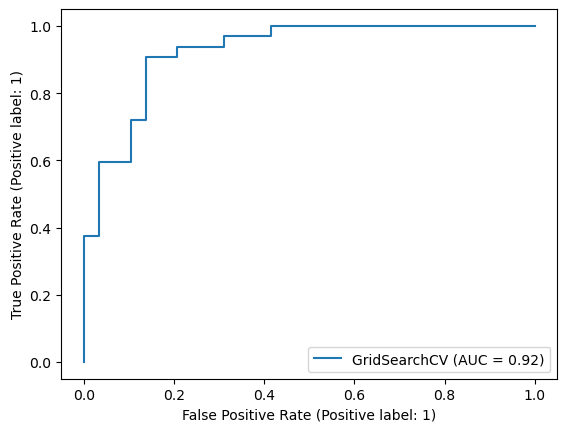

In [50]:
plot_roc_curve(gs_log_reg,X_test,Y_test)

In [51]:
#Confusion Matrix
print(confusion_matrix(Y_test,Y_preds))

[[25  4]
 [ 3 29]]


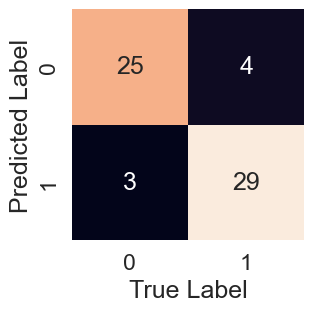

In [52]:
sns.set(font_scale=1.5)
def plot_conf_mat(Y_test,Y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test,Y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
plot_conf_mat(Y_test,Y_preds)

In [53]:
#Classification_Report,Cross-validated precision,recall,f1-score
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [54]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [55]:
clf = LogisticRegression(C=0.23357214690901212,solver = "liblinear")

In [56]:
#Accuracy
cv_acc = cross_val_score(clf,X,Y,cv=5,scoring="accuracy")

In [57]:
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [59]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [60]:
#Precision
cv_pre = cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.8215873015873015

In [61]:
#Recall
cv_re = cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_re = np.mean(cv_re)
cv_re

0.9272727272727274

In [62]:
#F1-score
cv_f1 = cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

<AxesSubplot: title={'center': 'CV metrics'}>

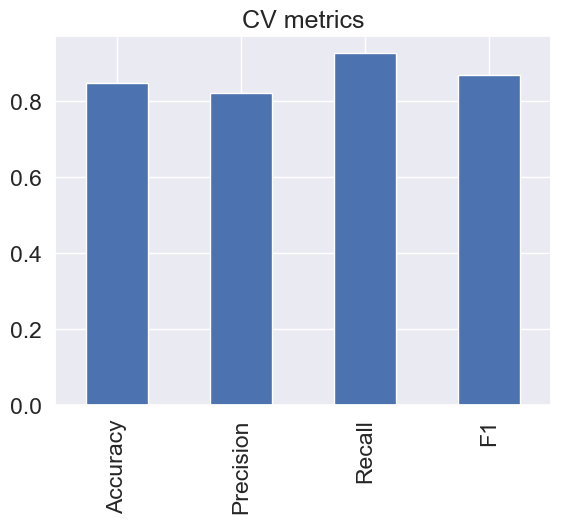

In [63]:
#Visualize The Evaluations
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_pre,"Recall":cv_re,"F1":cv_f1},index=[0])
cv_metrics.T.plot.bar(title="CV metrics",legend=False)

In [64]:
#Model exportation